# Calculating Latitudinal RFO Average

To calculate latitudinal RFO, one does not need to calculate the weighted RFO which accounts for the overweighting of RFO near the poles in an Equal-Angle format.
The calculation of mean RFO is confined to the a single latitude, therefore a standard average can be used.

The only thing that needs special attention is what latitudes are averaged -- that is, at what latitudes do the data lie? The average is computed using the latitude from the middle of a gridbox.

1. H1 data is created from 1x1 gridboxes, so the latitudes used to compute average RFO span from $89.5^{\circ}N$ to $89.5^{\circ}S$, starting at $89.5^{\circ}N$ and incrementing one degree until the final latitude (i.e. $89.5^{\circ}N$, $88.5^{\circ}N$, etc.) 

2. H2 data is created from 2x2 gridboxes, so the latitudes span $89^{\circ}N$ to $89^{\circ}S$ incrementing by 2 degrees.

3. D data was created from 2.5x2.5 gridboxes, so the latitudes span $88.75^{\circ}N$ to $88.75^{\circ}S$ incrementing by 2.5 degrees.

Here, average latitudinal RFO will be calculated for the H1 dataset only.

In [10]:
import os
import gc
import math
import time
import netCDF4
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib

Using matplotlib backend: Qt5Agg


### Load All Data

In [3]:
# Load all H1 data
path = '/media/dtropf/usb/H1_data/H1_'
h1_data = np.zeros((12,12,360*180))
years = [str(i) for i in range(1984, 2013)]
for year in years:
    tmpdata = np.load(path+year+'.npy')
    h1_data[:,:,:] = h1_data[:,:,:]+tmpdata[:,:,:]
    del tmpdata
    gc.collect()

### Normalize Data

In [4]:
# H1 data
h1_total = np.sum(np.sum(h1_data, axis=0),axis=0)
h1_masked_total = np.ma.masked_where(h1_total<=0,h1_total)
h1_masked = np.ma.masked_where(np.sum(h1_data,axis=0)<=0, np.sum(h1_data, axis=0))
h1_normed = np.ma.zeros((12, 360*180))
for i in range(12):
    h1_normed[i,:] = h1_masked[i,:]/h1_masked_total

### Calculate Average RFO for every Latitude for every WS

In [5]:
latbox1 = np.arange(.5, 90, 1.0)
lcontainer = []
count = 0
for i in range(12):
    # Rotate so rows are latitude
    tmp_map = np.rot90(h1_normed[i,:].reshape(360, 180))
    avg_list = []
    for row in tmp_map:
        avg = np.mean(row)
        avg_list.insert(0, avg)
    lcontainer.append(avg_list)

### Plot Average Latitudtinal RFO

In [26]:
fig, axes = plt.subplots(nrows=3,ncols=4, subplot_kw=dict(facecolor='white'))
for j, ax in enumerate(axes.flatten()):
    line1, = ax.plot(lcontainer[j], np.arange(0,90,.5), label='H1', color='blue')
    degree = '$\degree$'
    ax.set_yticks([0, 21.5, 44, 65.5, 89])
    ax.set_yticklabels([str(90)+degree+' S', str(45)+degree+' S',str(0)+degree,str(45)+degree+' N',str(90)+degree+' N'])
    ax.set_title('WS '+str(j+1))
    ax.grid()
    ax.set_xlim(-.05, 1)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.suptitle('Average Latitudinal RFO', fontweight='extra bold', fontsize='xx-large')
fig.legend(handles=(line1,), shadow=True, ncol=3, loc='upper center', bbox_to_anchor=(.5,.95), facecolor='darkgrey')
plt.show()    

/home/dtropf/anaconda3/envs/dask/lib/python3.6/site-packages/numpy/core/numeric.py:544: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
BELOW HERE WAS FOR SOME EXTRA STUFF GEORGE WANTED

In [3]:
# Load all H1 data
path = '/media/dtropf/usb/H2_data/H2_'
h1_data = np.zeros((12,12,180*90))
years = [str(i) for i in range(1984, 2013)]
for year in years:
    tmpdata = np.load(path+year+'.npy')
    h1_data[:,:,:] = h1_data[:,:,:]+tmpdata[:,:,:]
    del tmpdata
    gc.collect()

In [4]:
# H1 data
h1_total = np.sum(np.sum(h1_data, axis=0),axis=0)
h1_masked_total = np.ma.masked_where(h1_total<=0,h1_total)
h1_masked = np.ma.masked_where(np.sum(h1_data,axis=0)<=0, np.sum(h1_data, axis=0))
h1_normed = np.ma.zeros((12, 180*90))
for i in range(12):
    h1_normed[i,:] = h1_masked[i,:]/h1_masked_total

In [6]:
latbox1 = np.arange(.5, 90, 1.0)
lcontainer = []
count = 0
for i in range(12):
    # Rotate so rows are latitude
    tmp_map = np.rot90(h1_normed[i,:].reshape(180, 90))
    avg_list = []
    for row in tmp_map:
        avg = np.mean(row)
        avg_list.insert(0, avg)
    lcontainer.append(avg_list)

/home/dtropf/anaconda3/envs/dask/lib/python3.6/site-packages/numpy/core/numeric.py:544: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


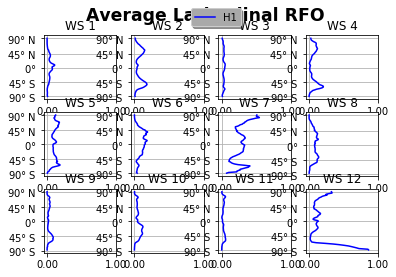

In [8]:
fig, axes = plt.subplots(nrows=3,ncols=4, subplot_kw=dict(facecolor='white'))
for j, ax in enumerate(axes.flatten()):
    line1, = ax.plot(lcontainer[j], np.arange(0,90), label='H1', color='blue')
    degree = '$\degree$'
    ax.set_yticks([0, 21.5, 44, 65.5, 89])
    ax.set_yticklabels([str(90)+degree+' S', str(45)+degree+' S',str(0)+degree,str(45)+degree+' N',str(90)+degree+' N'])
    ax.set_title('WS '+str(j+1))
    ax.grid()
    ax.set_xlim(-.05, 1)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.suptitle('Average Latitudinal RFO', fontweight='extra bold', fontsize='xx-large')
fig.legend(handles=(line1,), shadow=True, ncol=3, loc='upper center', bbox_to_anchor=(.5,.95), facecolor='darkgrey')
plt.show()    

In [28]:
colors = ['mediumturquoise', 'mediumblue', 'indianred', 'darkorchid', 'darkseagreen',
         'darkorange', 'indigo', 'crimson', 'olive', 'black', 'teal', 'steelblue']
fig, ax = plt.subplots(subplot_kw=dict(facecolor='white'))
handles = [None for i in range(10)]
for j in range(10):
    if j == 8:
        #tmp = np.zeros((len(lcontainer[j])))
        #for v in range(8,11):
        #    tmp1 = lcontainer[v]
        #    tmp = tmp + tmp1
            
        tmp = [lcontainer[v] for v in range(8, 11)]
        l = np.sum(tmp, axis=0)
        #l = tmp
    elif j < 8:
        l = lcontainer[j]
    else:
        l = lcontainer[11]
    if j== 8:
        handles[j], = ax.plot(np.arange(0,90), l, label='SUM of WS 9,10,11', color=colors[j], lw=4)
    elif j < 8:
        handles[j], = ax.plot(np.arange(0,90), l, label='WS '+str(j+1), color=colors[j], lw=4)
    else:
        handles[j], = ax.plot(np.arange(0,90), l, label='WS '+str(12), color=colors[j], lw=4)
    
degree = '$\degree$'
ax.set_xticks([0, 21.5, 44, 65.5, 89.5])
ax.set_xticklabels([str(90)+degree+' S', str(45)+degree+' S',str(0)+degree,str(45)+degree+' N',str(90)+degree+' N'])
#ax.set_title('WS '+str(j+1))
ax.set_xlabel('Latitude', size= 'xx-large', weight='extra bold')
ax.set_ylabel('RFO', size= 'xx-large', weight='extra bold')
ax.grid()
ax.set_ylim(-.000, .55)
ax.set_xlim(-.005,89)
ax.set_yticks([(0),(.10), (.20), (.30), (.40), (.50), (.55)])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.suptitle('WS Average Latitudinal RFO for H2 Dataset', fontweight='extra bold', fontsize='xx-large')
fig.legend(handles=handles, shadow=True, ncol=12, loc='upper center', bbox_to_anchor=(.5,.95), facecolor='silver')
plt.show()    

/home/dtropf/anaconda3/envs/dask/lib/python3.6/site-packages/numpy/core/numeric.py:544: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/dtropf/anaconda3/envs/dask/lib/python3.6/site-packages/numpy/core/_methods.py:32: UserWarning: Warning: converting a masked element to nan.
  return umr_sum(a, axis, dtype, out, keepdims)


In [27]:
colors = ['mediumturquoise', 'mediumblue', 'indianred', 'darkorchid', 'darkseagreen',
         'darkorange', 'indigo', 'crimson', 'olive', 'black', 'teal', 'steelblue']
fig, ax = plt.subplots(subplot_kw=dict(facecolor='white'))
handles = [None for i in range(12)]
for j in range(12):
    handles[j], = ax.plot(np.arange(0,90), lcontainer[j], label='WS '+str(j+1), color=colors[j], lw=4)
    
degree = '$\degree$'
ax.set_xticks([0, 21.5, 44, 65.5, 89.5])
ax.set_xticklabels([str(90)+degree+' S', str(45)+degree+' S',str(0)+degree,str(45)+degree+' N',str(90)+degree+' N'])
#ax.set_title('WS '+str(j+1))
ax.set_xlabel('Latitude', size= 'xx-large', weight='extra bold')
ax.set_ylabel('RFO', size= 'xx-large', weight='extra bold')
ax.grid()
ax.set_ylim(-.000, .55)
ax.set_xlim(-.005,89)
ax.set_yticks([(0),(.10), (.20), (.30), (.40), (.50), (.55)])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.suptitle('WS Average Latitudinal RFO for H2 Dataset', fontweight='extra bold', fontsize='xx-large')
fig.legend(handles=handles, shadow=True, ncol=12, loc='upper center', bbox_to_anchor=(.5,.95), facecolor='silver')
plt.show()    

/home/dtropf/anaconda3/envs/dask/lib/python3.6/site-packages/numpy/core/numeric.py:544: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
